<h1> Free energy - one system and phase diagrams

<h5> Phase Diagram for Free energy

In [15]:
def calculate_systems(max_iter=100, 
                      beta=30,
                      alpha_R_initial = [0,0,2],
                      tol_iter = 1e-3):
    """
    Calculate the energy for SC and SOC systems at a beta.
    """
    L_y = 85
    L_z = 85
    #NC
    nc_system = define_system(beta=beta, alpha_R_initial = alpha_R_initial,L_y=L_y, L_z=L_z, L_nc = 5, L_sc = 0, L_soc=0)
    solve_system(nc_system, max_iter, tol_iter)
    
    # SOC
    soc_system = define_system(beta=beta, alpha_R_initial = alpha_R_initial,L_y=L_y, L_z=L_z, L_nc = 0, L_sc = 0, L_soc=5)
    solve_system(soc_system, max_iter, tol_iter)
    
    # SC
    sc_system = define_system(beta=beta, alpha_R_initial = alpha_R_initial,L_y=L_y, L_z=L_z, L_nc = 0, L_sc = 5, L_soc=0)
    solve_system(sc_system, max_iter, tol_iter)
    
    energies_nc_soc_sc = np.array([nc_system.compute_energy(), soc_system.compute_energy(), sc_system.compute_energy()])
    return energies_nc_soc_sc

<h4> Free energy as a function of the strength of alpha

In [16]:
def pd_search_along_alpha_strength(alpha_max, L_nc = 50, L_soc = 2, L_sc = 50, theta = 0, xz = False, yz = False):
    alpha = np.ones((len(alpha_max), 3), dtype=np.float64)
    for i in range(len(alpha_max)):
        alpha[i] = alpha_max[i]*alpha[i,:]
        
    
    if(xz==True):
        alpha[:] = alpha[:]*np.array([np.sin(theta), 0*theta, np.cos(theta)]) # xz plane, sin(phi)=0
    if(yz==True):
        alpha[:] = alpha[:]*np.array([0*theta, np.sin(theta), np.cos(theta)]) # yz plane, cos(phi)=0
    if((yz == False) and (xz == False)):
        print("You have to choose orientation of alpha, xz or yz!")
        return

    free_energy = np.zeros(shape=(alpha.shape[0], 3), dtype=np.float128)
    tps = ['NC', 'SOC', 'SC']
    
    for i in range(alpha.shape[0]):
        print("---- alpha = ", alpha[i, :], "-----")
        e = calculate_systems(alpha_R_initial = alpha[i, :])
        free_energy[i,:] = e[:] # es:soc energy, sc energy
    return free_energy, alpha_max


In [17]:
alpha_max = np.linspace(0,3,20)
free_energy_alpha_strengt, alpha_max_array = pd_search_along_alpha_strength(alpha_max=alpha_max, xz=True)

---- alpha =  [0. 0. 0.] -----
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2


/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave/solve_hamiltonian.py:54: RuntimeWarning: invalid value encountered in true_divide
  delta_diff = abs(sum((delta_store[:,0]-delta_store[:,1]) / delta_store[:,1]))


delta_diff =  nan
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  nan
Hermition:  True
Iteration nr. 1
delta_diff =  3.1442541925255076
Iteration nr. 2
delta_diff =  0.6522508580098595
Iteration nr. 3
delta_diff =  0.35053143837509837
Iteration nr. 4
delta_diff =  0.18572743980924367
Iteration nr. 5
delta_diff =  0.0976129654880262
Iteration nr. 6
delta_diff =  0.051075659381370916
Iteration nr. 7
delta_diff =  0.02666199432007235
Iteration nr. 8
delta_diff =  0.013900495913537751
Iteration nr. 9
delta_diff =  0.00724245475677852
Iteration nr. 10
delta_diff =  0.003772203833980835
Iteration nr. 11
delta_diff =  0.001964397557028525
Iteration nr. 12
delta_diff =  0.0010228816215142838
Iteration nr. 13
delta_diff =  0.0005326012674968757
---- alpha =  [0.         0.         0.15789474] -----
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  nan
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  

In [18]:
print(free_energy_alpha_strengt.shape)

(20, 3)


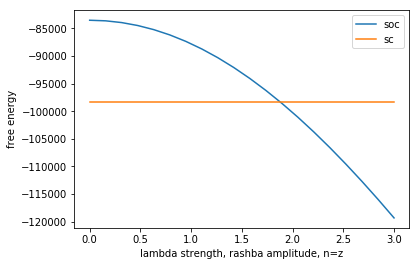

In [19]:
# free_energy_alpha_strength, alpha_max_array
#plt.plot(alpha_max_array, free_energy_alpha_strengt[:,0], label="nc")
plt.plot(alpha_max_array, free_energy_alpha_strengt[:,1], label="soc")
plt.plot(alpha_max_array, free_energy_alpha_strengt[:,2], label="sc")
plt.xlabel("lambda strength, rashba amplitude, n=z")
plt.ylabel("free energy")
plt.legend()
#plt.savefig('PD - free_energy_lambda_strength, n=z.png', dpi=200, bbox_inches='tight')
plt.show()

<h4> Free energy as a function of the angle of alpha

In [27]:
def pd_search_along_alpha_angle(alpha_max = 2, L_nc = 7, L_soc = 3, L_sc = 7, xz=False, yz=False):
    theta = np.linspace(0,np.pi/2,30)
    if(xz==True):
        alpha = alpha_max*np.array([np.sin(theta[:]), 0*theta[:], np.cos(theta[:])]) # xz plane, sin(phi)=0
    if(yz==True):
        alpha = alpha_max*np.array([0*theta[:], np.sin(theta[:]), np.cos(theta[:])]) # yz plane, cos(phi)=0
    if((yz == False) and (xz == False)):
        print("You have to choose orientation of alpha, xz or yz!")
        return
    
    free_energy = np.zeros(shape=(alpha.shape[1], 3), dtype=np.float128)
    tps = ['NC', 'SOC']
    
    for i in range(alpha.shape[1]):
        print("---- alpha = ", alpha[:,i], "-----")
        e = calculate_systems(alpha_R_initial = alpha[:,i])
        free_energy[i,:] = e[:] # es:soc energy, sc energy
    return free_energy, theta


In [31]:
#magnitude of alpha vector
alpha_max = 2.0

free_energy_angle_pd_xz, theta_array_pd_xz = pd_search_along_alpha_angle(alpha_max=alpha_max, xz=True)
free_energy_angle_pd_yz, theta_array_pd_yz = pd_search_along_alpha_angle(alpha_max=alpha_max, yz=True)

---- alpha =  [0. 0. 2.] -----
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2


/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave/solve_hamiltonian.py:54: RuntimeWarning: invalid value encountered in true_divide
  delta_diff = abs(sum((delta_store[:,0]-delta_store[:,1]) / delta_store[:,1]))


delta_diff =  nan
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  0.0
Hermition:  True
Iteration nr. 1
delta_diff =  3.1442541925255076
Iteration nr. 2
delta_diff =  0.6522508580098595
Iteration nr. 3
delta_diff =  0.35053143837509837
Iteration nr. 4
delta_diff =  0.18572743980924367
Iteration nr. 5
delta_diff =  0.0976129654880262
Iteration nr. 6
delta_diff =  0.051075659381370916
Iteration nr. 7
delta_diff =  0.02666199432007235
Iteration nr. 8
delta_diff =  0.013900495913537751
Iteration nr. 9
delta_diff =  0.00724245475677852
Iteration nr. 10
delta_diff =  0.003772203833980835
Iteration nr. 11
delta_diff =  0.001964397557028525
Iteration nr. 12
delta_diff =  0.0010228816215142838
Iteration nr. 13
delta_diff =  0.0005326012674968757
---- alpha =  [0.10827782 0.         1.99706683] -----
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  nan
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  

KeyboardInterrupt: 

In [ ]:
# free_energy_alpha_strength, alpha_max_array
#plt.plot(theta_array, free_energy_alpha_strengt[:,0], label="nc")
plt.plot(theta_array_pd_xz, free_energy_angle_pd_xz[:,1], label="soc")
plt.plot(theta_array_pd_xz, free_energy_angle_pd_xz[:,2], label="sc")
plt.xlabel("lambda angle, xz plane, rashba amplitude = 2.0")
plt.ylabel("free energy")
plt.legend()
#plt.savefig('PD - free_energy_lambda_angle_xz, strength=2.0.png', dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
# free_energy_alpha_strength, alpha_max_array
#plt.plot(theta_array_pd_yz, free_energy_angle_pd_yz[:,0], label="nc")
plt.plot(theta_array_pd_yz, free_energy_angle_pd_yz[:,1], label="soc")
plt.plot(theta_array_pd_yz, free_energy_angle_pd_yz[:,2], label="sc")
plt.xlabel("lambda angle, yz plane, rashba amplitude = 2.0")
plt.ylabel("free energy")
plt.legend()
#plt.savefig('PD - free_energy_lambda_angle_yz, strengt=2.0.png', dpi=200, bbox_inches='tight')
plt.show()

<h5> Free Energy diagram w.r.t. rashba alpha orientation

In [1]:
import sys
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave")
from main import solve_and_return_system_and_F_matrix
from main import define_system, solve_and_test_small_system
from plots import plot_pairing_amplitude, plot_density_of_states

from solve_hamiltonian import solve_system

In [2]:
#Free energy

def calculate_energy_of_system(max_iter=100, 
                      beta=33.3,
                      alpha_R_initial = [0,0,2],
                      tol_iter = 1e-3,
                      L_nc = 50, L_soc = 2, L_sc = 50):
    """
    Calculate the energy for nc - soc - sc system at a given alpha.
    """
    L_y = 85#L_nc+L_soc+L_sc
    L_z = 85#L_nc+L_soc+L_sc
    #nc - soc - sc
    nc_soc_sc_system = define_system(beta=beta, alpha_R_initial = alpha_R_initial,L_y=L_y, L_z=L_z, L_nc = L_nc, L_sc = L_sc, L_soc=L_soc)
    solve_system(nc_soc_sc_system, max_iter, tol_iter)
    
    
    energies_nc_soc_sc = np.array([nc_soc_sc_system.compute_energy(N=False)]) #N=True gives only free energy in NC layer
    return energies_nc_soc_sc

def search_along_alpha(alpha_max = 2, L_nc = 50, L_soc = 2, L_sc = 50, xz=False, yz=False):
    #phi = np.linspace(0,np.pi,30)
    theta = np.linspace(0,np.pi/2,20)
    #alpha = alpha_max*np.array([np.cos(phi[:]), np.sin(phi[:]), 0*phi[:]]) # xy plane, Theta=0
    if(xz==True):
        alpha = alpha_max*np.array([np.sin(theta[:]), 0*theta[:], np.cos(theta[:])]) # xz plane, sin(phi)=0
    if(yz==True):
        alpha = alpha_max*np.array([0*theta[:], np.sin(theta[:]), np.cos(theta[:])]) # yz plane, cos(phi)=0
    if((yz == False) and (xz == False)):
        print("You have to choose orientation of alpha, xz or yz!")
        return
    
    free_energy = np.zeros(shape=(alpha.shape[1], 1), dtype=np.float128)
    tps = ['NC', 'SOC']
    
    for i in range(alpha.shape[1]):
        print("---- alpha = ", alpha[:,i], "-----")
        e = calculate_energy_of_system(alpha_R_initial = alpha[:,i], L_nc = L_nc, L_soc = L_soc, L_sc = L_sc)
        free_energy[i,:] = e[:] 
    return free_energy, theta



In [3]:
#magnitude of alpha vector
alpha_max = 0.8

free_energy_array_nc_soc_xz, theta_array_nc_soc_xz = search_along_alpha(alpha_max=alpha_max, L_nc=7, L_soc=3, L_sc=0, xz=True)
free_energy_array_nc_soc_yz, theta_array_nc_soc_yz = search_along_alpha(alpha_max=alpha_max, L_nc=7, L_soc=3, L_sc=0, yz=True)
#free_energy_array_soc_sc, alpha_array_soc_sc = search_along_alpha(alpha_max=alpha_max, L_nc=0, L_soc=2, L_sc=5)

---- alpha =  [0.  0.  0.8] -----
Hermition:  True
Iteration nr. 1
delta_diff =  10.0
Iteration nr. 2
delta_diff =  0.0
---- alpha =  [0.06606348 0.         0.79726759] -----
Hermition:  True
Iteration nr. 1
delta_diff =  10.0
Iteration nr. 2
delta_diff =  0.0
---- alpha =  [0.13167567 0.         0.78908904] -----
Hermition:  True
Iteration nr. 1
delta_diff =  10.0
Iteration nr. 2
delta_diff =  0.0
---- alpha =  [0.19638839 0.         0.77552021] -----
Hermition:  True
Iteration nr. 1
delta_diff =  10.0
Iteration nr. 2
delta_diff =  0.0
---- alpha =  [0.25975958 0.         0.75665379] -----
Hermition:  True
Iteration nr. 1
delta_diff =  10.0
Iteration nr. 2
delta_diff =  0.0
---- alpha =  [0.32135634 0.         0.73261866] -----
Hermition:  True
Iteration nr. 1
delta_diff =  10.0
Iteration nr. 2
delta_diff =  0.0
---- alpha =  [0.38075791 0.         0.703579  ] -----
Hermition:  True
Iteration nr. 1
delta_diff =  10.0
Iteration nr. 2
delta_diff =  0.0
---- alpha =  [0.43755853 0.      

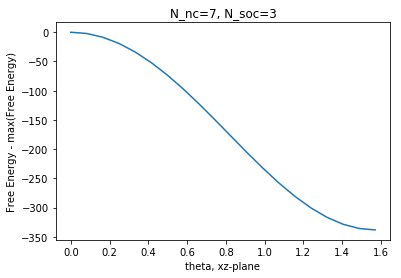

In [4]:
plt.plot(theta_array_nc_soc_xz, free_energy_array_nc_soc_xz-max(free_energy_array_nc_soc_xz))
plt.xlabel('theta, xz-plane')
plt.ylabel('Free Energy - max(Free Energy)')
plt.title("N_nc=7, N_soc=3")
#plt.savefig('free_energy_lambda_angle_xz, stength=0.8.png', dpi=200, bbox_inches='tight')
plt.show()

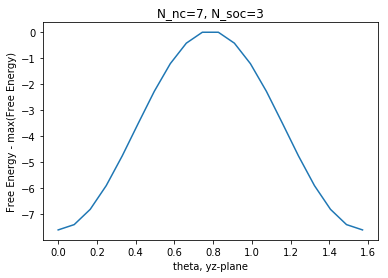

In [5]:
plt.plot(theta_array_nc_soc_yz, free_energy_array_nc_soc_yz-max(free_energy_array_nc_soc_yz))
plt.xlabel('theta, yz-plane')
plt.ylabel('Free Energy - max(Free Energy)')
plt.title("N_nc=7, N_soc=3")
#plt.savefig('free_energy_lambda_angle_yz, stength=0.8.png', dpi=200, bbox_inches='tight')
plt.show()

Phase diagram - 2D for alpha strength and angle

In [1]:
import sys
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave")
from main import solve_and_return_system_and_F_matrix
from main import define_system, solve_and_test_small_system
from plots import plot_pairing_amplitude, plot_density_of_states

from solve_hamiltonian import solve_system

In [23]:
def calculate_systems_2d(max_iter=10, 
                      beta=30,
                      alpha_R_initial = [0,0,2],
                      tol_iter = 1e-3):
    """
    Calculate the energy for SC and SOC systems at a beta.
    """
    L_y = 20
    L_z = 20
    #NC
    nc_system = define_system(beta=beta, alpha_R_initial = alpha_R_initial,L_y=L_y, L_z=L_z, L_nc = 5, L_sc = 0, L_soc=0)
    solve_system(nc_system, max_iter, tol_iter)
    
    # SOC
    soc_system = define_system(beta=beta, alpha_R_initial = alpha_R_initial,L_y=L_y, L_z=L_z, L_nc = 0, L_sc = 0, L_soc=5)
    solve_system(soc_system, max_iter, tol_iter)
    
    # SC
    sc_system = define_system(beta=beta, alpha_R_initial = alpha_R_initial,L_y=L_y, L_z=L_z, L_nc = 0, L_sc = 5, L_soc=0)
    solve_system(sc_system, max_iter, tol_iter)
    
    energies_nc_soc_sc = np.array([nc_system.compute_energy(), soc_system.compute_energy(), sc_system.compute_energy()])
    return energies_nc_soc_sc

def pd_search_along_alpha_2d(alpha_max, xz=False, yz=False):
    theta = np.linspace(0,np.pi/2,15)
    
    free_energies_2d = np.zeros(((len(theta), len(alpha_max), 3)))
    for j in range(len(theta)):
        # for each theta value, we do a PD over alpha-strength
        alpha = np.ones((len(alpha_max), 3), dtype=np.float64)
        for i in range(len(alpha_max)):
            alpha[i] = alpha_max[i]*alpha[i,:]

        if(xz==True):
            alpha = alpha[:]*np.array([np.sin(theta[j]), 0*theta[j], np.cos(theta[j])]) # xz plane, sin(phi)=0
        if(yz==True):
            alpha = alpha[:]*np.array([0*theta[j], np.sin(theta[j]), np.cos(theta[j])]) # yz plane, cos(phi)=0
        if((yz == False) and (xz == False)):
            print("You have to choose orientation of alpha, xz or yz!")
            return
        #print(alpha)
        free_energy = np.zeros(shape=(alpha.shape[0], 3), dtype=np.float128)
        tps = ['SC','NC', 'SOC']

        for i in range(alpha.shape[0]):
            print("---- alpha = ", alpha[i,:], "-----")
            e = calculate_systems_2d(alpha_R_initial = alpha[i,:])
            free_energy[i,:] = e[:] # es:soc energy, sc energy
        
        # add new PD for theis theta value to the total PD arrray
        free_energies_2d[j,:,:] = free_energy
    return free_energies_2d, theta, alpha_max


In [24]:
alpha_max = np.linspace(1.5,2,15)
free_energy_2d_yz, theta_array_2d_yz, alpha_array_2d_yz = pd_search_along_alpha_2d(alpha_max, xz=False, yz=True)

---- alpha =  [0.  0.  1.5] -----
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2


/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave/solve_hamiltonian.py:62: RuntimeWarning: invalid value encountered in true_divide
  delta_diff = abs(sum((delta_store[:,0]-delta_store[:,1]) / delta_store[:,1]))


delta_diff =  nan
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  0.0
Hermition:  True
Iteration nr. 1
delta_diff =  3.2850176487183456
Iteration nr. 2
delta_diff =  0.4049482161914816
Iteration nr. 3
delta_diff =  0.22581113561670363
Iteration nr. 4
delta_diff =  0.12490939474287795
Iteration nr. 5
delta_diff =  0.06877356527292483
Iteration nr. 6
delta_diff =  0.037766735424256424
Iteration nr. 7
delta_diff =  0.020709431272588966
Iteration nr. 8
delta_diff =  0.011347070733822646
Iteration nr. 9
delta_diff =  0.006214618429673421
Iteration nr. 10
delta_diff =  0.0034028826674983403
Iteration nr. 11
delta_diff =  0.0018630665845882975
---- alpha =  [0.         0.         1.53571429] -----
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  nan
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  0.0
Hermition:  True
Iteration nr. 1
delta_diff =  3.2850176487183456
Iteration nr. 2
delta_diff =  0

In [25]:
alpha_max = np.linspace(1.5, 2, 15)
free_energy_2d_xz, theta_array_2d_xz, alpha_array_2d_xz = pd_search_along_alpha_2d(alpha_max, xz=True, yz=False)

---- alpha =  [0.  0.  1.5] -----
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2


/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave/solve_hamiltonian.py:62: RuntimeWarning: invalid value encountered in true_divide
  delta_diff = abs(sum((delta_store[:,0]-delta_store[:,1]) / delta_store[:,1]))


delta_diff =  nan
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  0.0
Hermition:  True
Iteration nr. 1
delta_diff =  3.2850176487183456
Iteration nr. 2
delta_diff =  0.4049482161914816
Iteration nr. 3
delta_diff =  0.22581113561670363
Iteration nr. 4
delta_diff =  0.12490939474287795
Iteration nr. 5
delta_diff =  0.06877356527292483
Iteration nr. 6
delta_diff =  0.037766735424256424
Iteration nr. 7
delta_diff =  0.020709431272588966
Iteration nr. 8
delta_diff =  0.011347070733822646
Iteration nr. 9
delta_diff =  0.006214618429673421
Iteration nr. 10
delta_diff =  0.0034028826674983403
Iteration nr. 11
delta_diff =  0.0018630665845882975
---- alpha =  [0.         0.         1.53571429] -----
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  nan
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  0.0
Hermition:  True
Iteration nr. 1
delta_diff =  3.2850176487183456
Iteration nr. 2
delta_diff =  0

In [8]:
print(free_energy_2d_yz.shape)
print(theta_array_2d_yz.shape)
print(alpha_array_2d_yz.shape)

(30, 20, 3)
(30,)
(20,)


In [26]:
from mpl_toolkits import mplot3d
%matplotlib inline
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import matplotlib.pyplot as plt

/Users/martinedh/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


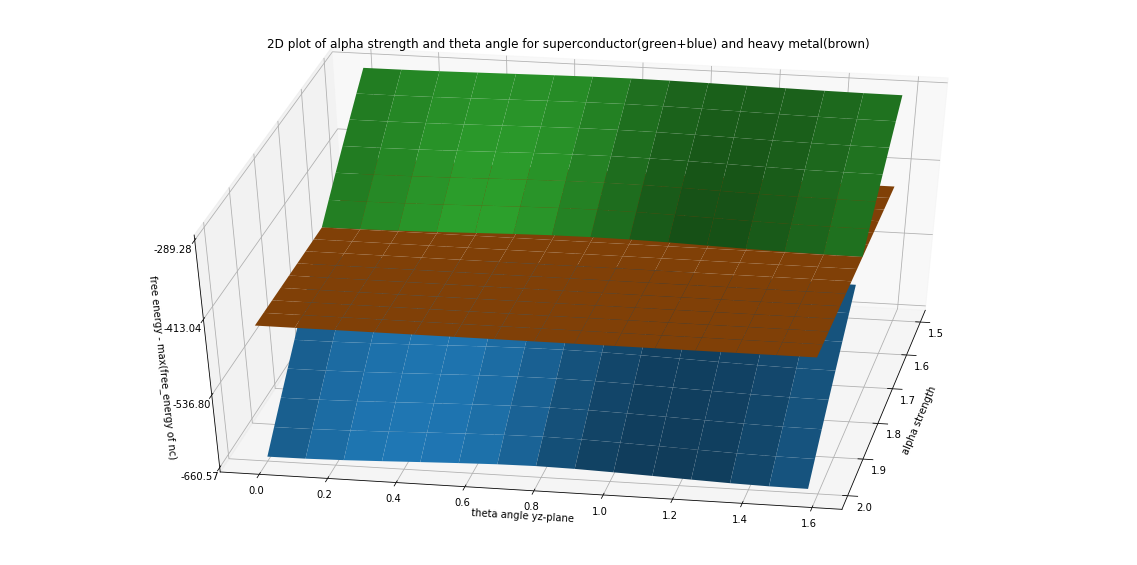

In [39]:
# yz direction
X, Y = np.meshgrid( alpha_array_2d_yz, theta_array_2d_yz,)
Z_nc = free_energy_2d_yz[:,:,0]-np.max(free_energy_2d_yz[:,:,0])
Z_soc = free_energy_2d_yz[:,:,1]-np.max(free_energy_2d_yz[:,:,0])
Z_sc = free_energy_2d_yz[:,:,2]-np.max(free_energy_2d_yz[:,:,0])

fig = plt.figure(111, figsize=(20,10))
ax = fig.gca(projection='3d')


# Plot the surface.
#surf_nc = ax.plot_surface(X, Y, Z_nc,linewidth=0, antialiased=True)
#surf_soc = ax.plot_surface(X, Y, Z_soc,linewidth=0, antialiased=True)
#surf_sc = ax.plot_surface(X, Y, Z_sc,linewidth=0, antialiased=True)

surf1= ax.plot_surface(X,Y,np.where(Z_soc<Z_sc,Z_soc,np.nan))#, label="soc")
surf2=ax.plot_surface(X,Y,Z_sc)#, label="sc")
surf3=ax.plot_surface(X,Y,np.where(Z_soc>=Z_sc,Z_soc,np.nan))#, label="soc")

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(4))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(40, 10)

ax.set_xlabel("alpha strength")
ax.set_ylabel("theta angle yz-plane")
ax.set_zlabel("free energy - max(free_energy of nc)")
ax.set_title("2D plot of alpha strength and theta angle for superconductor(green+blue) and heavy metal(brown)")
#plt.savefig('PD_2D_alpha_strength_and_theta_angel_xz_side2.png', dpi=200, bbox_inches='tight')
#plt.show()


/Users/martinedh/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


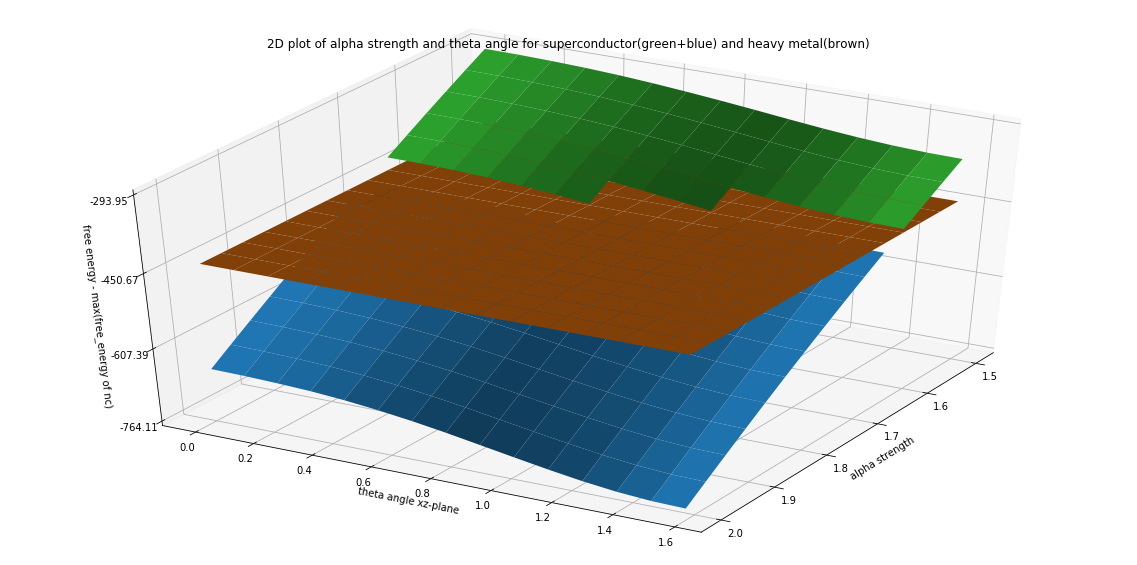

In [47]:
# xz direction
X, Y = np.meshgrid( alpha_array_2d_xz, theta_array_2d_xz,)
Z_nc = free_energy_2d_xz[:,:,0]-np.max(free_energy_2d_xz[:,:,0])
Z_soc = free_energy_2d_xz[:,:,1]-np.max(free_energy_2d_xz[:,:,0])
Z_sc = free_energy_2d_xz[:,:,2]-np.max(free_energy_2d_xz[:,:,0])

fig = plt.figure(111, figsize=(20,10))
ax = fig.gca(projection='3d')


# Plot the surface.
#surf_nc = ax.plot_surface(X, Y, Z_nc,linewidth=0, antialiased=True)
#surf_soc = ax.plot_surface(X, Y, Z_soc,linewidth=0, antialiased=True)
#surf_sc = ax.plot_surface(X, Y, Z_sc,linewidth=0, antialiased=True)

surf1= ax.plot_surface(X,Y,np.where(Z_soc<Z_sc,Z_soc,np.nan))#, label="soc")
surf2=ax.plot_surface(X,Y,Z_sc)#, label="sc")
surf3=ax.plot_surface(X,Y,np.where(Z_soc>=Z_sc,Z_soc,np.nan))#, label="soc")

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(4))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(40, 30)

ax.set_xlabel("alpha strength")
ax.set_ylabel("theta angle xz-plane")
ax.set_zlabel("free energy - max(free_energy of nc)")
ax.set_title("2D plot of alpha strength and theta angle for superconductor(green+blue) and heavy metal(brown)")
#plt.savefig('PD_2D_alpha_strength_and_theta_angel_xz_side2.png', dpi=200, bbox_inches='tight')
#plt.show()

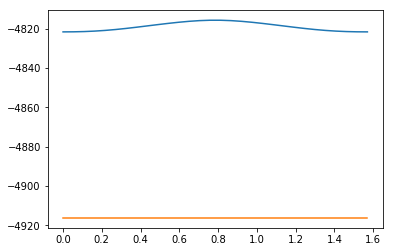

In [37]:
plt.plot(theta_array_2d_yz, free_energy_2d_yz[:,10,1])
plt.plot(theta_array_2d_yz, free_energy_2d_yz[:,10,2])
plt.show()